### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
#Imports comunes
import numpy as np
import pandas as pd
import seaborn as sns

#Semilla
np.random.seed(42)

#Matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#K-Means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit
from sklearn.metrics import silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("./data/drugLibTrain_raw.tsv",sep="\t")
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [5]:
columnas_seleccionadas = ['rating','effectiveness','sideEffects']
df_nuevo = df[columnas_seleccionadas].copy()
df_nuevo.head()

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas

In [6]:
#Creamos un map para pasar de valores categóricos a enteros.
mapa_effectiveness = {
    'Highly Effective':4,
    'Considerably Effective':3,
    'Moderately Effective':2,
    'Marginally Effective':1,
    'Ineffective':0
}

mapa_side_effects = {
    'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,
    'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
}

df_nuevo['effectiveness'] = df_nuevo['effectiveness'].map(mapa_effectiveness)
df_nuevo['sideEffects'] = df_nuevo['sideEffects'].map(mapa_side_effects)

#Normalizamos a continuación los datos:
scaler = StandardScaler()
df_nuevo = pd.DataFrame(scaler.fit_transform(df_nuevo),columns=df_nuevo.columns)
df_nuevo.head()

,rating,effectiveness,sideEffects
0,-1.023494,0.865108,-0.258895
1,-2.044907,0.865108,1.439917
2,1.019330,0.865108,-1.108302
3,-1.363965,-1.573256,-0.258895
4,-1.704436,-1.573256,1.439917


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

Para k=2, el silhouette score es 0.5240
Para k=3, el silhouette score es 0.4055
Para k=4, el silhouette score es 0.3728
Para k=5, el silhouette score es 0.4021
Para k=6, el silhouette score es 0.3966
Para k=7, el silhouette score es 0.4176
Para k=8, el silhouette score es 0.4336
Para k=9, el silhouette score es 0.4872
Para k=10, el silhouette score es 0.5156

El mejor valor de K es: 2


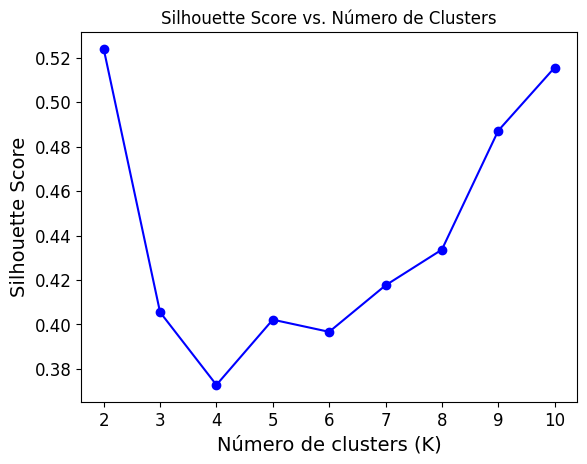

In [ ]:
#Silhouette_Score se trata de una métrica utilizada para evaluar la calidad de los cústeres.
silhouette_scores = []
K = range(2, 11)

for k in K:
    # Creamos y ajustamos el modelo de K-Means.
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_nuevo)
    
    # Calculamos el silhouette score.
    score = silhouette_score(df_nuevo, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"Para k={k}, el silhouette score es {score:.4f}")

# Encontramos a continuación el mejor valor para K.
mejor_K = K[np.argmax(silhouette_scores)]
print(f"\nEl mejor valor de K es: {mejor_K}")

#Visualizamos los resultados empleando para ello una gráfica, la cual, el punto más alto nos dirá el mejor valor de K.
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Número de Clusters')
plt.show()

Como se puede ver en la gráfica, podemos ver que el mejor sihouette_score es del valor K=2. 
Con un valor de 0.5240. Seguido del valor para K=10.

#### Genera el K Means 

In [8]:
KMeans()

KMeans()

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [9]:
kmeans = KMeans(n_clusters=mejor_K, random_state=42)
df_nuevo['Cluster'] = kmeans.fit_predict(df_nuevo)

df_nuevo.head()

,rating,effectiveness,sideEffects,Cluster
0,-1.023494,0.865108,-0.258895,0
1,-2.044907,0.865108,1.439917,1
2,1.019330,0.865108,-1.108302,0
3,-1.363965,-1.573256,-0.258895,1
4,-1.704436,-1.573256,1.439917,1


In [10]:
contar_clusters = df_nuevo['Cluster'].value_counts().sort_index()
print("\nDistribución de elementos por cluster:")
print(contar_clusters) #Observamos la distribución de los clusters en el conjunto de datos.


Distribución de elementos por cluster:
Cluster
0    2224
1     883
Name: count, dtype: int64


Queremos realizar a continuación un gráfico pie para visualizar la distribución de los clusters.

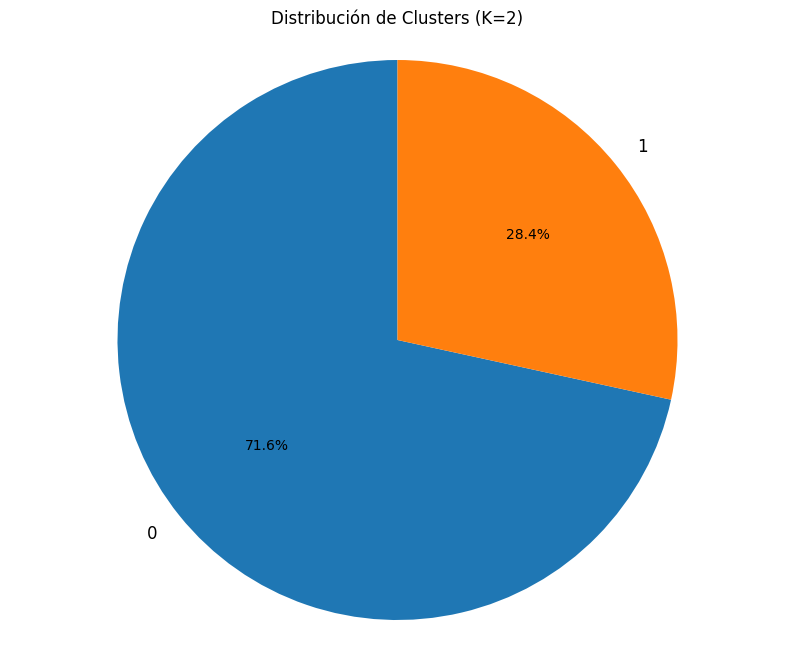

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(contar_clusters.values, labels=contar_clusters.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribución de Clusters (K={mejor_K})')
plt.axis('equal')
plt.show()

In [12]:
print("\nEstadísticas por cluster:")
df_nuevo.groupby('Cluster').mean()
#Agrupamos los datos del dataframe según los valores únicos de lo que es la columna "Cluster".
#Tras agruparlo, realizamos lo que es la media para cada grupo creado.


Estadísticas por cluster:


,rating,effectiveness,sideEffects
Cluster,,,
0,0.538017,0.438613,-0.411284
1,-1.355097,-1.104730,1.035896
